<a href="https://colab.research.google.com/github/ahmadalis2016/IridiumAI_TimeSeries_Forecasting/blob/main/Iridium_AI_Chronos_TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-npfj03m6
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-npfj03m6
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit eb7bdfc047de3e7af972b4ee7cf23a7968b7daa3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from chronos import ChronosPipeline

In [3]:
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-tiny",
    device_map="cuda",
    torch_dtype=torch.bfloat16,
)

config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeseriesAnalysisWithPython/master/data/AirPassengers.csv")

In [5]:
context = torch.tensor(df["#Passengers"])

In [6]:
prediction_length = 12

In [7]:
forecast = pipeline.predict(
    context=context,
    prediction_length=prediction_length,
)

In [8]:
forecast_index = range(len(df), len(df) + prediction_length)

In [9]:
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.975], axis=0)


In [10]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

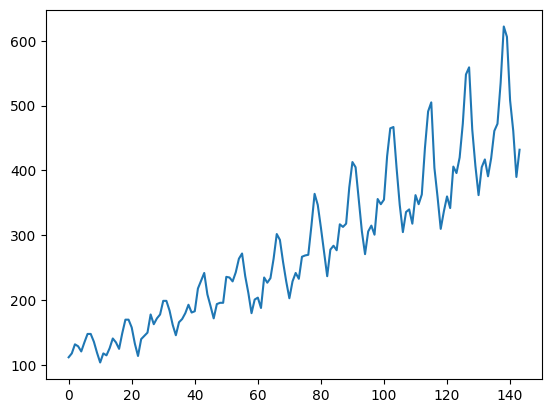

In [11]:
plt.plot(df["#Passengers"], label="historical data")

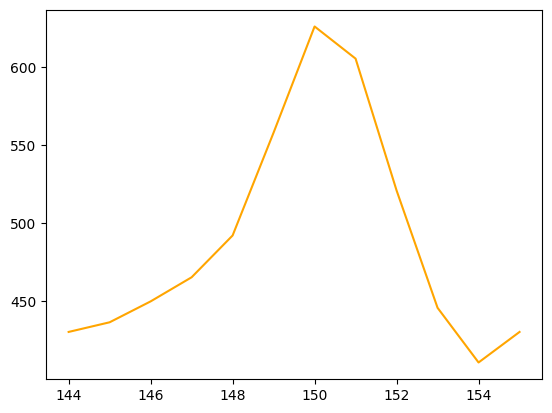

In [13]:
plt.plot(forecast_index, median, color = "orange", label="median forecast")

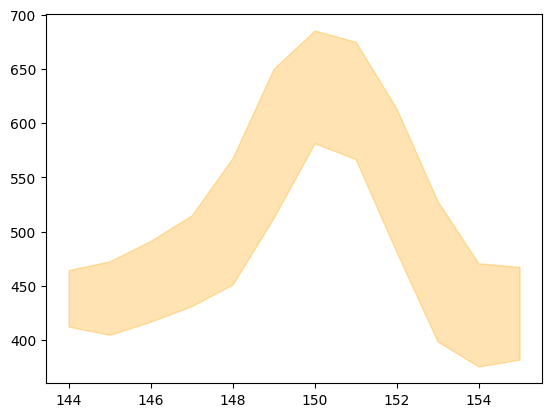

In [14]:
plt.fill_between(forecast_index, low, high, alpha=0.3, color = "orange", label="forecast interval")